In [2]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper
from openpyxl import Workbook

%matplotlib inline
importlib.reload(DataLoader)
coverage_df = DataLoader.load_csv_coverage()


Number of apps: 
381


Total entries:
1987


Number of apps: 
381


Total entries:
1987


Total covered methods:
4229784


Everything is good!


Coverage report

In [3]:
coverage_df.head()

,package,class,method,strategy,coverage_type,coverage_percentage,covered_lines,total_lines,app
0,com.peakpocketstudios.atmosphere,com.peakpocketstudios.atmosphere.BuildConfig,BuildConfig (): void,systematic,method,0,0,1,com.peakpocketstudios.atmosphere
1,com.peakpocketstudios.atmosphere,com.peakpocketstudios.atmosphere.BuildConfig,BuildConfig (): void,systematic,block,0,0,3,com.peakpocketstudios.atmosphere
2,com.peakpocketstudios.atmosphere,com.peakpocketstudios.atmosphere.CancionPerson...,CancionPersonalizadaAdapter$1 (CancionPersonal...,systematic,method,0,0,1,com.peakpocketstudios.atmosphere
3,com.peakpocketstudios.atmosphere,com.peakpocketstudios.atmosphere.CancionPerson...,CancionPersonalizadaAdapter$1 (CancionPersonal...,systematic,block,0,0,12,com.peakpocketstudios.atmosphere
4,com.peakpocketstudios.atmosphere,com.peakpocketstudios.atmosphere.CancionPerson...,"onClick (DialogInterface, int): void",systematic,method,0,0,1,com.peakpocketstudios.atmosphere


In [4]:
# coverage_temp = systematic_coverage_per_app = coverage_df[coverage_df.coverage_type == "method"].groupby(["app", "strategy"])[
#     ['covered_lines', 'total_lines']].apply(
#     lambda x: x.sum())
# invalid_apps = coverage_temp[coverage_temp.covered_lines == 0]
# invalid_apps.head()
# writer = pd.ExcelWriter('invalid.xlsx')
# invalid_apps.to_excel(writer,'Sheet1')
# writer.save()




Systematic App coverage

In [5]:
systematic_method_coverage = CoverageHelper.filter("method", "systematic", coverage_df)
systematic_coverage_per_app = systematic_method_coverage.groupby(["app"])['coverage_percentage'].apply(
    lambda x: x.sum() / x.count()).sort_values(ascending=False)
systematic_coverage_per_app.head()
# systematic_coverage_per_app.plot.box()


app
com.theronrogers.vaultyfree              100.000000
com.junjundroid.gordyn                    91.304348
com.snaptattooadder                       81.538462
com.watchtv.freetv                        78.947368
com.nglish.spanish.english.translator     75.342466
Name: coverage_percentage, dtype: float64

Random App coverage

In [6]:
random_method_coverage = CoverageHelper.filter("method", "random", coverage_df)
random_coverage_per_app = random_method_coverage.groupby(["app"])['coverage_percentage'].apply(
    lambda x: x.sum() / x.count()).sort_values(ascending=False)
random_coverage_per_app.head()
# random_coverage_per_app.plot.box()

app
com.theronrogers.vaultyfree       100.000000
com.snaptattooadder                95.384615
com.watchtv.freetv                 94.736842
com.junjundroid.gordyn             91.304348
uk.co.resortmarketing.curryguy     64.627660
Name: coverage_percentage, dtype: float64

Plot random vs systematic app coverage per app

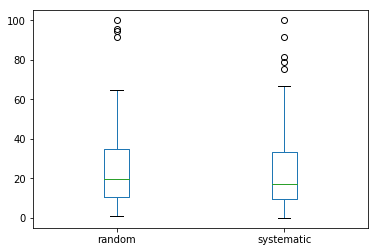

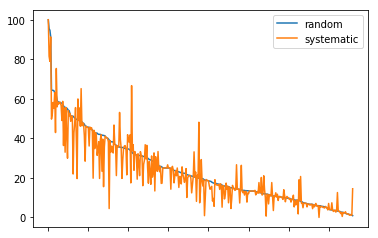

In [7]:
random_and_systematic_coverage = pd.concat(
    [random_coverage_per_app.rename('random'), systematic_coverage_per_app.rename('systematic')], axis=1,
    sort=False)
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
random_and_systematic_coverage.plot()

In [8]:
random_and_systematic_coverage.describe()

,random,systematic
count,381.000000,381.000000
mean,24.112367,22.377313
std,17.602828,17.063693
min,0.887574,0.000000
25%,10.617929,9.602195
50%,19.693095,17.368421
75%,34.965035,33.167082
max,100.000000,100.000000


Block app coverage

In [9]:
random_block_coverage_per_app = random_coverage_per_app = \
    CoverageHelper.filter("block", "random", coverage_df).groupby(["app"])[
        ['covered_lines', 'total_lines']].apply(
        lambda x: x.sum())
random_block_coverage_per_app['percentage_covered'] = (random_block_coverage_per_app.covered_lines / random_block_coverage_per_app.total_lines) * 100
random_block_coverage_per_app.head()
random_block_coverage_per_app.describe()


,covered_lines,total_lines,percentage_covered
count,381.000000,3.810000e+02,381.000000
mean,7784.753281,6.908836e+04,22.202232
std,14100.553250,1.441665e+05,18.663543
min,3.000000,3.000000e+00,0.277496
25%,781.000000,4.235000e+03,8.457521
50%,2766.000000,1.788600e+04,16.366401
75%,7633.000000,6.681600e+04,32.501058
max,107070.000000,1.496391e+06,100.000000


In [10]:
systematic_block_coverage_per_app = systematic_coverage_per_app = CoverageHelper.filter("block", "systematic", coverage_df).groupby(["app"])[
    ['covered_lines', 'total_lines']].apply(
    lambda x: x.sum())
systematic_block_coverage_per_app['percentage_covered'] = (systematic_block_coverage_per_app.covered_lines / systematic_block_coverage_per_app.total_lines) * 100
systematic_block_coverage_per_app.head()
# systematic_block_coverage_per_app.describe()


,covered_lines,total_lines,percentage_covered
app,,,
alex.map.maps,484,6844,7.071888
androidlab.carlog,787,6599,11.926049
asp.aniemo.pack6.ext,103,182,56.593407
bestfreelivewallpapers.funny_photo_editor,5294,121368,4.361941
bestfreelivewallpapers.love_photo_frames_hd,1976,47816,4.132508


In [11]:
random_and_systematic_block_coverage = pd.concat(
    [random_block_coverage_per_app.percentage_covered.rename('random'), systematic_block_coverage_per_app.percentage_covered.rename('systematic')], axis=1,
    sort=False)
random_and_systematic_block_coverage.head()


,random,systematic
app,,
alex.map.maps,20.455874,7.071888
androidlab.carlog,10.744052,11.926049
asp.aniemo.pack6.ext,56.593407,56.593407
bestfreelivewallpapers.funny_photo_editor,5.770879,4.361941
bestfreelivewallpapers.love_photo_frames_hd,4.529864,4.132508


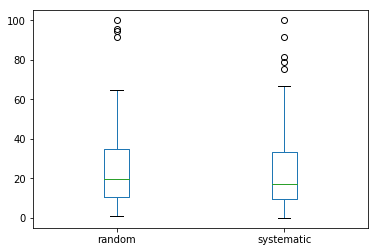

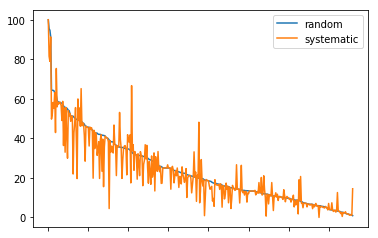

In [12]:
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
random_and_systematic_coverage.plot()

,diff_coverage,total_lines
app,,
alex.map.maps,13.383986,6844
androidlab.carlog,-1.181997,6599
asp.aniemo.pack6.ext,0.000000,182
bestfreelivewallpapers.funny_photo_editor,1.408938,121368
bestfreelivewallpapers.love_photo_frames_hd,0.397357,47816


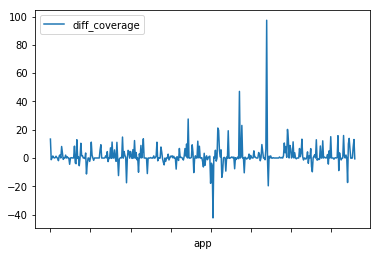

In [13]:
diff_in_coverage_per_app = random_and_systematic_block_coverage['random'] - random_and_systematic_block_coverage['systematic']
# systematic_block_coverage_per_app['percentage_covered'] = (systematic_block_coverage_per_app.covered_lines / systematic_block_coverage_per_app.total_lines) * 100
diff_in_coverage_per_app = diff_in_coverage_per_app.to_frame(name="diff_coverage")
diff_in_coverage_per_app.plot()
diff_in_coverage_per_app["total_lines"] = random_block_coverage_per_app.total_lines
diff_in_coverage_per_app.head()
# diff_in_coverage_per_app.describe()

In [14]:
diff_in_coverage_per_app.diff_coverage.describe()


count    381.000000
mean       1.518931
std        8.011557
min      -42.345277
25%       -0.039435
50%        0.000000
75%        1.553939
max       97.364086
Name: diff_coverage, dtype: float64

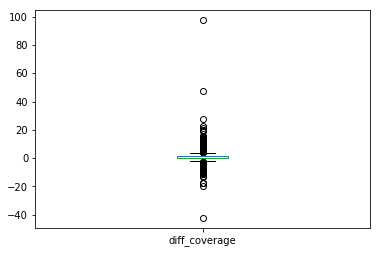

In [15]:
diff_in_coverage_per_app.diff_coverage.plot.box()

,diff_coverage,total_lines
diff_coverage,1.000000,-0.016376
total_lines,-0.016376,1.000000


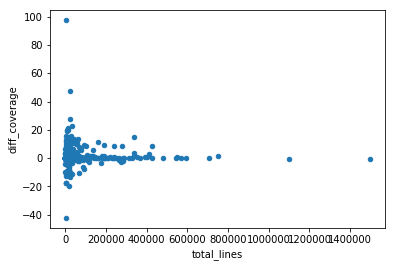

In [18]:
diff_in_coverage_per_app.plot.scatter(x="total_lines", y=0)
diff_in_coverage_per_app.corr()

,random,systematic,total_lines
app,,,
alex.map.maps,20.455874,7.071888,6844
androidlab.carlog,10.744052,11.926049,6599
asp.aniemo.pack6.ext,56.593407,56.593407,182
bestfreelivewallpapers.funny_photo_editor,5.770879,4.361941,121368
bestfreelivewallpapers.love_photo_frames_hd,4.529864,4.132508,47816


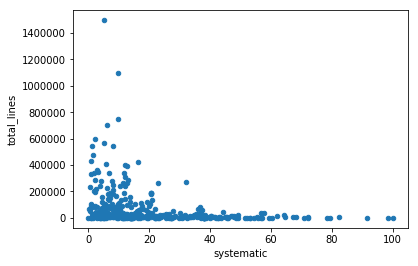

In [19]:

test = random_and_systematic_block_coverage
test["total_lines"] = random_block_coverage_per_app.total_lines
test.plot.scatter(y="total_lines", x= "systematic")
test.head()
